In [17]:
# Importing Necessary Packages

import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

# Getting the Dataset 

Categories=['Female','Male']
input_arr=[] #input array
target_arr=[] #output array
datadir=r"D:\5th SEM KARE\AISR\Dataset" 

# Path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        input_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
    

loading... category : Female
loaded category:Female successfully
loading... category : Male
loaded category:Male successfully


In [3]:
# Seperating Dependent and Independent Variables
input_data=np.array(input_arr)
target=np.array(target_arr)
df=pd.DataFrame(input_data) 
df['Target']=target

x=df.iloc[:,:-1]  
y=df.iloc[:,-1] 

In [4]:
# Defining the Model SVM(Kernel)

from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)

model=GridSearchCV(svc,param_grid)

# C -- Cost of Miscalculations
# Gamma -- defines how far the influence of single training examples reaches values leads to biased results.
# Kernel -- SVM algorithms use a set of mathematical functions that are defined as the kernel.
# Linear , RBF (Radial Basis Function), Polynomial Kernel

In [5]:
# Training and testing the model and fitting the model

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
model.fit(x_train,y_train)
# model.best_params_ contains the best parameters obtained from GridSearchCV

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [6]:
# Finding the accuracy using accuracy score

from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("Predicted Data is :")
print(y_pred)
print("Actual data is:")
print(np.array(y_test))
print(f"The SVM Model has the accuracy of  {accuracy_score(y_pred,y_test)*100}% ")

Predicted Data is :
[1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0
 1 0 0 0 0]
Actual data is:
[1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0
 1 0 0 1 0]
The SVM Model has the accuracy of  73.80952380952381% 


In [22]:
# Creating an Function to classify the Inputs 

def classify():
    # Getting the User input to classify the data
    Image_Link=input('Enter URL of Image to be Classified :')
    Image=imread(Image_Link)
    plt.imshow(Image)
    plt.show()

    img_resize=resize(Image,(150,150,3))
    final_image=[img_resize.flatten()]
    probability=model.predict_proba(final_image)
    for ind,val in enumerate(Categories):
        print(f'{val} = {probability[0][ind]*100}%')
    print("The predicted image is of the gender "+Categories[model.predict(final_image)[0]])

Enter URL of Image to be Classified :C:\Users\Sanjay\Desktop\Tutorials with Sanju\Official Website\images\pp.jpeg


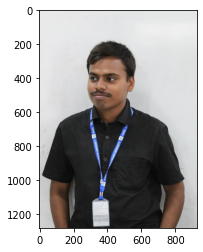

Female = 8.299192030923635%
Male = 91.70080796907637%
The predicted image is of the gender Male


In [23]:
# Image 1
# Link : "C:\Users\Sanjay\Desktop\Tutorials with Sanju\Official Website\images\pp.jpeg"
classify()

Enter URL of Image to be Classified :C:\Users\Sanjay\Desktop\Tutorials with Sanju\Official Website\images\student-2.png


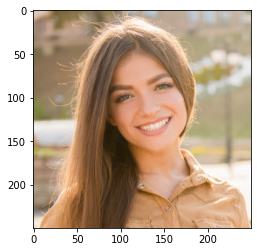

Female = 60.59249587357637%
Male = 39.40750412642362%
The predicted image is of the gender Female


In [24]:
# Image 2
# Link : "C:\Users\Sanjay\Desktop\Tutorials with Sanju\Official Website\images\student-2.png"
classify()

Enter URL of Image to be Classified :C:\Users\Sanjay\Desktop\Tutorials with Sanju\Official Website\images\vineeth.jpeg


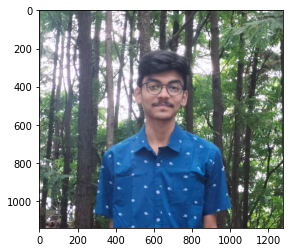

Female = 14.128137770427724%
Male = 85.87186222957229%
The predicted image is of the gender Male


In [25]:
# Image 3
# Link : "C:\Users\Sanjay\Desktop\Tutorials with Sanju\Official Website\images\vineeth.jpeg"
classify()

Enter URL of Image to be Classified :C:\Users\Sanjay\Desktop\Tutorials with Sanju\Official Website\images\WhatsApp.jpeg


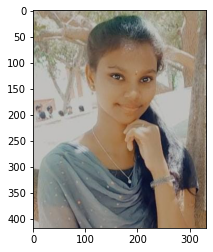

Female = 21.597542451434744%
Male = 78.40245754856528%
The predicted image is of the gender Male


In [26]:
# Image 4
# Link : "C:\Users\Sanjay\Desktop\Tutorials with Sanju\Official Website\images\WhatsApp.jpeg"
classify()